In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster  import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [9]:
data = pd.read_csv('dataset_ml_rendement_tunisie.csv')

In [10]:
data.shape

(9029, 13)

In [11]:
data.dtypes


annee                      int64
Item                      object
surface_cultivee_ha      float64
production_tonnes        float64
yield_value              float64
rendement_tonnes_ha      float64
pluviometrie_mm          float64
temperature_moyenne_c    float64
humidite_pct             float64
ph                       float64
azote_N                  float64
phosphore_P_mg_kg        float64
potassium_K_mg_kg        float64
dtype: object

In [12]:
data.columns

Index(['annee', 'Item', 'surface_cultivee_ha', 'production_tonnes',
       'yield_value', 'rendement_tonnes_ha', 'pluviometrie_mm',
       'temperature_moyenne_c', 'humidite_pct', 'ph', 'azote_N',
       'phosphore_P_mg_kg', 'potassium_K_mg_kg'],
      dtype='object')

In [13]:
data.columns.tolist()

['annee',
 'Item',
 'surface_cultivee_ha',
 'production_tonnes',
 'yield_value',
 'rendement_tonnes_ha',
 'pluviometrie_mm',
 'temperature_moyenne_c',
 'humidite_pct',
 'ph',
 'azote_N',
 'phosphore_P_mg_kg',
 'potassium_K_mg_kg']

In [14]:
data.describe()

,annee,surface_cultivee_ha,production_tonnes,yield_value,rendement_tonnes_ha,pluviometrie_mm,temperature_moyenne_c,humidite_pct,ph,azote_N,phosphore_P_mg_kg,potassium_K_mg_kg
count,9029.000000,4.760000e+03,9.029000e+03,4638.000000,4638.000000,1452.000000,1452.000000,1452.000000,2056.000000,2056.000000,2056.000000,2056.000000
mean,1992.953926,8.777206e+04,9.101886e+04,7603.244200,0.760324,331.687879,19.778278,64.648568,7.751431,0.116084,36.933150,216.857534
std,18.461041,2.948435e+05,2.777251e+05,10568.894521,1.056889,54.069836,0.413452,1.572270,0.023402,0.004586,1.993134,10.174984
min,1961.000000,0.000000e+00,0.000000e+00,5.900000,0.000590,242.757143,19.252916,62.569472,7.706615,0.106498,33.301538,199.420000
25%,1977.000000,1.200000e+03,9.160200e+02,802.100000,0.080210,301.585714,19.428650,63.381996,7.731538,0.114631,35.166154,210.921538
50%,1993.000000,5.600000e+03,8.200000e+03,4049.750000,0.404975,324.957143,19.569789,64.770646,7.754154,0.116640,37.701538,217.566154
75%,2009.000000,2.000000e+04,5.223911e+04,10906.875000,1.090688,376.514286,20.221526,66.263076,7.760308,0.118205,38.332308,224.290769
max,2024.000000,3.622842e+06,3.219344e+06,159090.900000,15.909090,422.414286,20.414052,66.744031,7.791231,0.127543,40.530769,232.978462


In [15]:
data.isnull().sum()

annee                       0
Item                        0
surface_cultivee_ha      4269
production_tonnes           0
yield_value              4391
rendement_tonnes_ha      4391
pluviometrie_mm          7577
temperature_moyenne_c    7577
humidite_pct             7577
ph                       6973
azote_N                  6973
phosphore_P_mg_kg        6973
potassium_K_mg_kg        6973
dtype: int64

In [16]:
data[data.isnull().all(axis=1)]



,annee,Item,surface_cultivee_ha,production_tonnes,yield_value,rendement_tonnes_ha,pluviometrie_mm,temperature_moyenne_c,humidite_pct,ph,azote_N,phosphore_P_mg_kg,potassium_K_mg_kg


In [17]:
(data.isnull().sum() / len(data)) * 100


annee                     0.000000
Item                      0.000000
surface_cultivee_ha      47.280983
production_tonnes         0.000000
yield_value              48.632185
rendement_tonnes_ha      48.632185
pluviometrie_mm          83.918485
temperature_moyenne_c    83.918485
humidite_pct             83.918485
ph                       77.228929
azote_N                  77.228929
phosphore_P_mg_kg        77.228929
potassium_K_mg_kg        77.228929
dtype: float64

In [18]:
data.head(10)

,annee,Item,surface_cultivee_ha,production_tonnes,yield_value,rendement_tonnes_ha,pluviometrie_mm,temperature_moyenne_c,humidite_pct,ph,azote_N,phosphore_P_mg_kg,potassium_K_mg_kg
0,1961,"Almonds, in shell",85000.0,5800.0,68.2,0.00682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1961,"Anise, badian, coriander, cumin, caraway, fenn...",NaN,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1961,Apples,1600.0,7100.0,4437.5,0.44375,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1961,Apricots,12000.0,11600.0,966.7,0.09667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1961,Artichokes,1900.0,11400.0,6000.0,0.60000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1961,Asparagus,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1961,Barley,200000.0,70000.0,350.0,0.03500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1961,"Beans, dry",0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1961,"Beef and Buffalo Meat, primary",NaN,15400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1961,"Beer of barley, malted",NaN,37601.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
data.tail(10)

,annee,Item,surface_cultivee_ha,production_tonnes,yield_value,rendement_tonnes_ha,pluviometrie_mm,temperature_moyenne_c,humidite_pct,ph,azote_N,phosphore_P_mg_kg,potassium_K_mg_kg
9019,2024,Sunflower seed,7469.0,6412.21,858.5,0.08585,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9020,2024,"Tangerines, mandarins, clementines",9520.0,81068.68,8515.7,0.85157,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9021,2024,Tomatoes,22592.0,1430769.66,63330.3,6.33303,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9022,2024,"Treenuts, Total",225554.0,74065.37,328.4,0.03284,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9023,2024,Triticale,10310.0,22326.43,2165.5,0.21655,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9024,2024,Unmanufactured tobacco,1584.0,2215.69,1398.5,0.13985,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9025,2024,Vegetables Primary,117743.0,3190802.74,27099.7,2.70997,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9026,2024,Vetches,102.0,254.13,2482.7,0.24827,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9027,2024,Watermelons,4648.0,504091.54,108448.2,10.84482,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN
9028,2024,Wheat,536000.0,1150000.00,2145.5,0.21455,325.714286,20.414052,64.088603,NaN,NaN,NaN,NaN


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9029 entries, 0 to 9028
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   annee                  9029 non-null   int64  
 1   Item                   9029 non-null   object 
 2   surface_cultivee_ha    4760 non-null   float64
 3   production_tonnes      9029 non-null   float64
 4   yield_value            4638 non-null   float64
 5   rendement_tonnes_ha    4638 non-null   float64
 6   pluviometrie_mm        1452 non-null   float64
 7   temperature_moyenne_c  1452 non-null   float64
 8   humidite_pct           1452 non-null   float64
 9   ph                     2056 non-null   float64
 10  azote_N                2056 non-null   float64
 11  phosphore_P_mg_kg      2056 non-null   float64
 12  potassium_K_mg_kg      2056 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 917.1+ KB


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


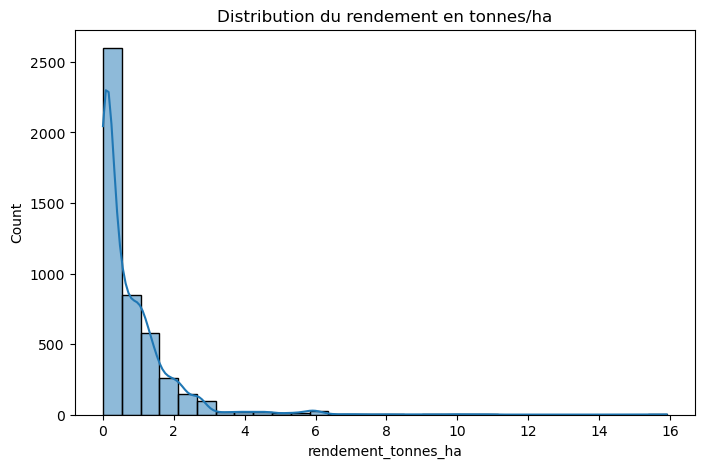

In [48]:
plt.figure(figsize=(8,5))
sns.histplot(data['rendement_tonnes_ha'], bins=30, kde=True)
plt.title("Distribution du rendement en tonnes/ha")
plt.show()

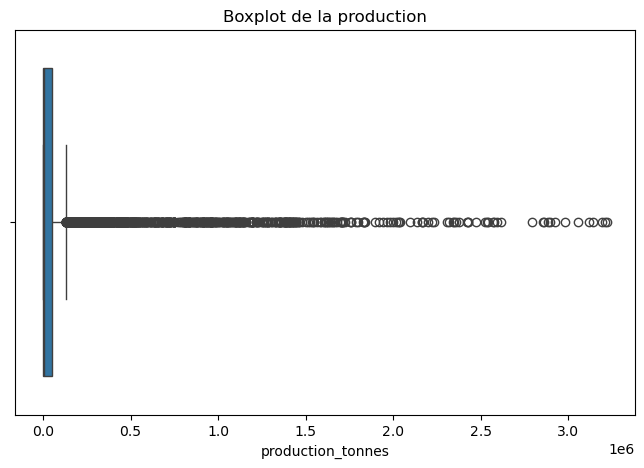

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(x=data['production_tonnes'])
plt.title("Boxplot de la production")
plt.show()


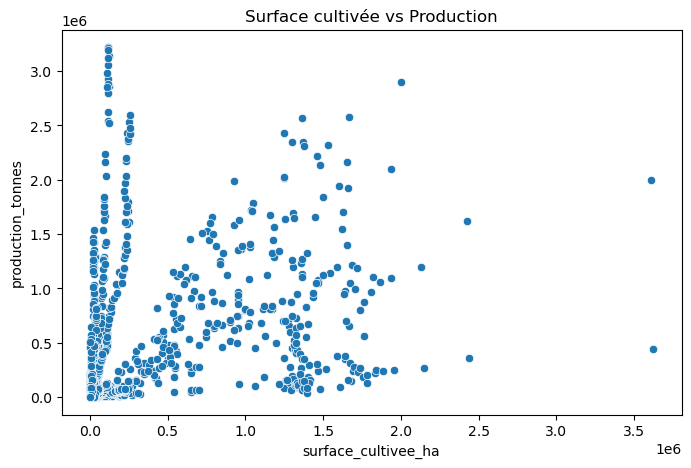

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='surface_cultivee_ha', y='production_tonnes', data=data)
plt.title("Surface cultivée vs Production")
plt.show()

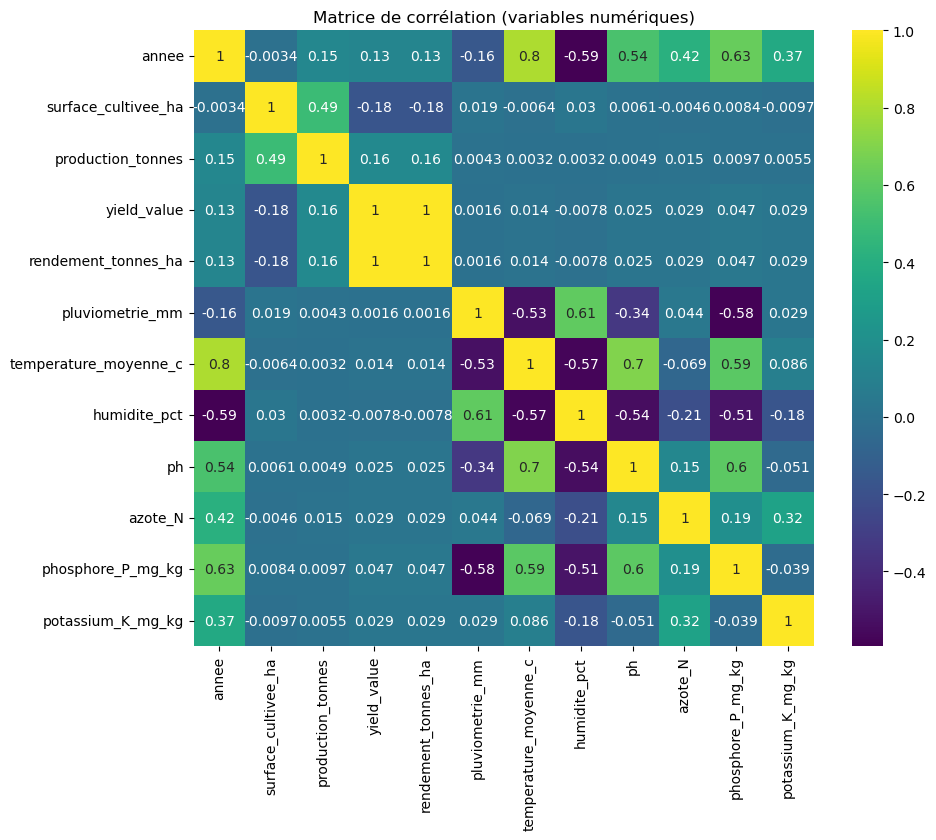

In [64]:
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculer la corrélation
corr = numeric_data.corr()

# Afficher la heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Matrice de corrélation (variables numériques)")
plt.show()


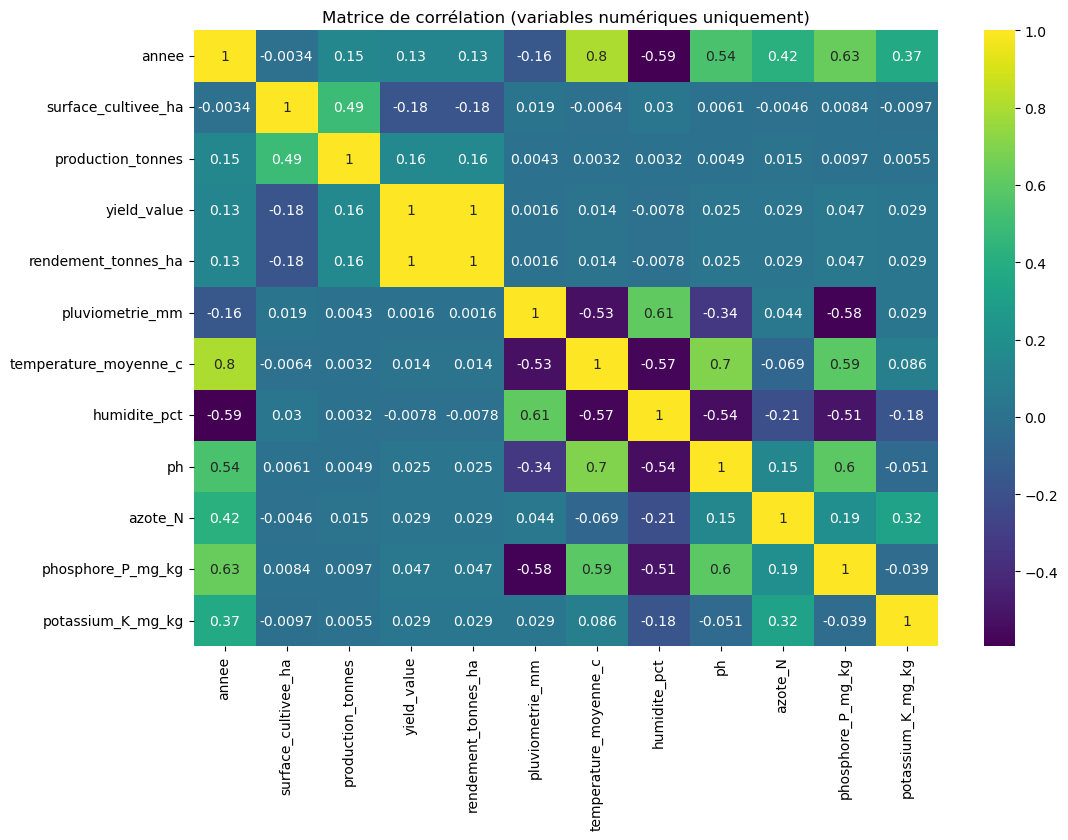

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Sélectionner seulement les colonnes numériques
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Calculer la corrélation
corr = numeric_df.corr()

# Afficher la heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title("Matrice de corrélation (variables numériques uniquement)")
plt.show()


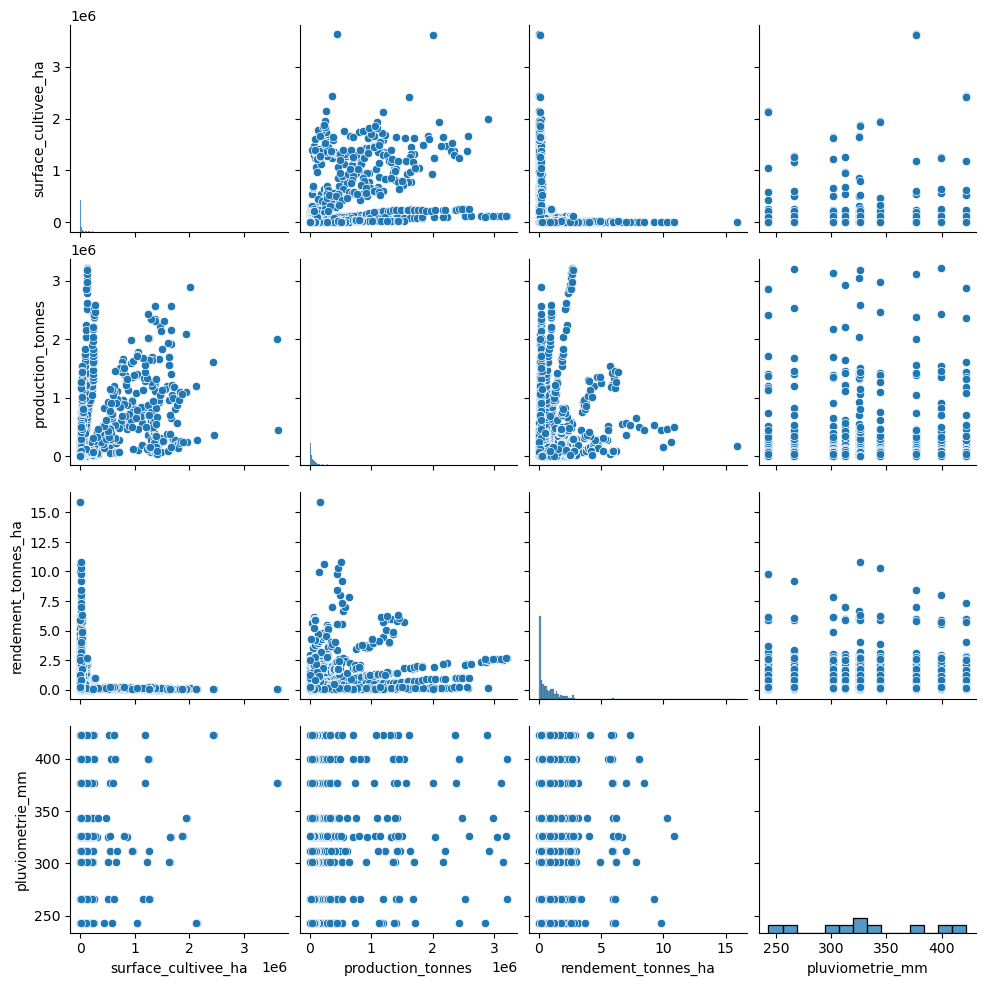

In [60]:
sns.pairplot(data[['surface_cultivee_ha', 'production_tonnes', 'rendement_tonnes_ha', 'pluviometrie_mm']])
plt.show()

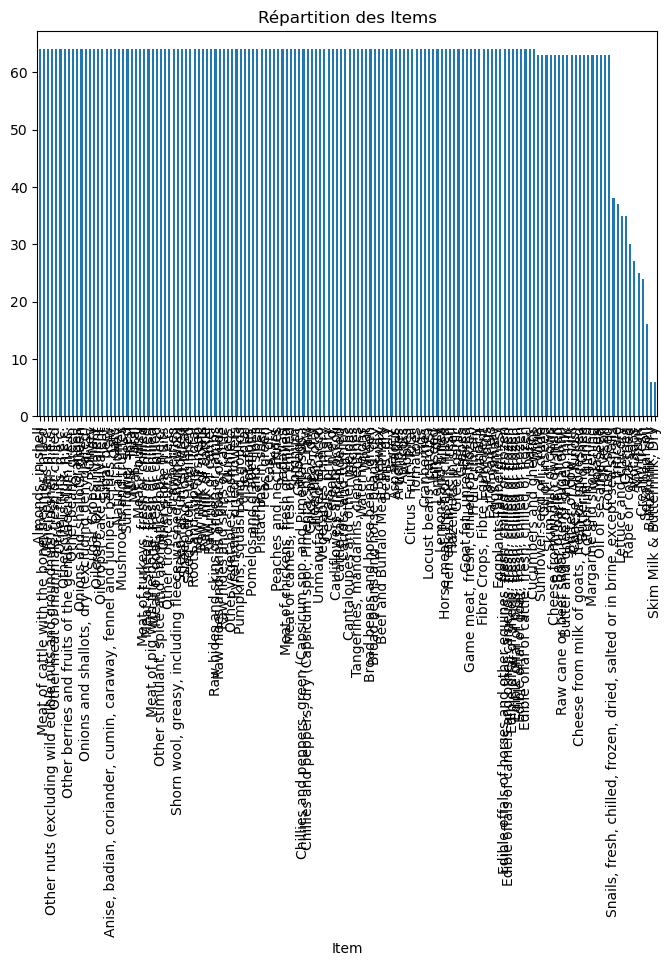

In [62]:
data['Item'].value_counts().plot(kind='bar', figsize=(8,5))
plt.title("Répartition des Items")
plt.show()